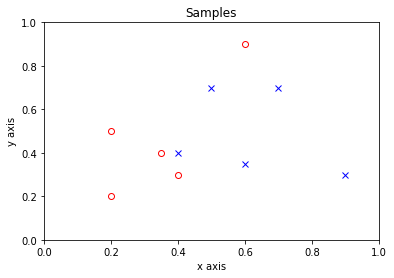

In [275]:
import numpy as np 
from matplotlib import pyplot as plt 
import matplotlib as mpl
import scipy.optimize as optimize
 
ax = np.array([0.2, 0.2, 0.35, 0.4, 0.6])
ay = np.array([0.2, 0.5, 0.4, 0.3, 0.9])

plt.plot(ax, ay,"or", fillstyle='none') 

bx = np.array([0.4, 0.5, 0.6, 0.7, 0.9])
by = np.array([0.4, 0.7, 0.35, 0.7, 0.3])

plt.plot(bx, by,"xb") 

plt.title("Samples") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.savefig('samples.jpg')
plt.show()

In [276]:
import math
from numpy import linalg as LA
sample_coordinates=np.array([np.concatenate((ax, bx)), np.concatenate((ay, by))])
sample_types=np.array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

def sigma(x):
    return 1/(1+math.exp(-x))

vecsigma=np.vectorize(sigma)

def fun(coeffs) :
    w2=np.array([[coeffs[0], coeffs[1]], [coeffs[2], coeffs[3]], [coeffs[4], coeffs[5]]])
    b2=np.array([coeffs[6], coeffs[7], coeffs[8]])
    w3=np.array([[coeffs[9], coeffs[10], coeffs[11]], [coeffs[12], coeffs[13], coeffs[14]]])
    b3=np.array([coeffs[15], coeffs[16]])
    
    second_layer=vecsigma(w2.dot(sample_coordinates)+b2[:,None])
    last_layer=vecsigma(w3.dot(second_layer)+b3[:,None])
    errors=last_layer-sample_types
    
    return errors.flatten()

def extract_coeffs(coeffs) :
    w2=np.array([[coeffs[0], coeffs[1]], [coeffs[2], coeffs[3]], [coeffs[4], coeffs[5]]])
    b2=np.array([coeffs[6], coeffs[7], coeffs[8]])
    w3=np.array([[coeffs[9], coeffs[10], coeffs[11]], [coeffs[12], coeffs[13], coeffs[14]]])
    b3=np.array([coeffs[15], coeffs[16]])
    return [w2, b2, w3, b3]


np.random.seed(10)

coeffs_init=0.5*np.random.randn(1,23).flatten()

opt=optimize.least_squares(fun, coeffs_init)

result=opt.x

[w2, b2, w3, b3]=extract_coeffs(opt.x)

N=500;

N = 500
Dx = 1/N
Dy = 1/N
xvals = np.linspace(0, 1, N)
yvals = np.linspace(0, 1, N)

Aval=np.zeros((N, N))
Bval=np.zeros((N, N))

for k1 in range(N) : 
    xk = xvals[k1]
    for k2 in range(N) : 
        yk = yvals[k2]
        xy = np.array([xk,yk])
        second_layer=vecsigma(w2.dot(xy)+b2)
        last_layer=vecsigma(w3.dot(second_layer)+b3)
        Aval[k2,k1] = last_layer[0]
        Bval[k2,k1] = last_layer[1]

[X,Y] = np.meshgrid(xvals,yvals)

Mval = Aval>Bval

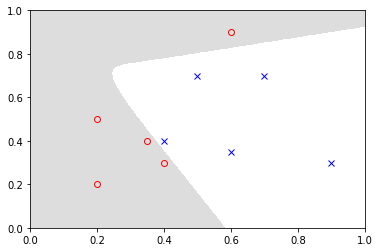

In [265]:
plt.plot(ax, ay,"or", fillstyle='none') 
plt.plot(bx, by,"xb") 

from matplotlib import colors

cmap = colors.ListedColormap(['white', '#dddddd'])

plt.contourf(X, Y, Mval, cmap=cmap)

plt.savefig('result_NN.jpg')

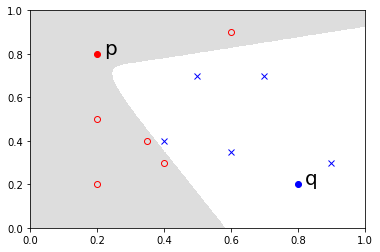

In [277]:
plt.plot(ax, ay,"or", fillstyle='none') 
plt.plot(bx, by,"xb") 

from matplotlib import colors

cmap = colors.ListedColormap(['white', '#dddddd'])

plt.plot(0.2, 0.8, 'or')
plt.text(0.22, 0.8, 'p', fontsize=20)

plt.plot(0.8, 0.2, 'ob')
plt.text(0.82, 0.2, 'q', fontsize=20)

plt.contourf(X, Y, Mval, cmap=cmap)

plt.savefig('p_in_result_NN.jpg')

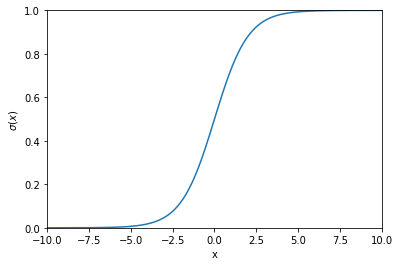

In [278]:
N = 1000
Dx = 1/N
xvals = np.linspace(-10, 10, N)

plt.plot(xvals, vecsigma(xvals))
plt.xlabel("x") 
plt.ylabel(r"$\sigma(x)$") 
plt.xlim([-10, 10])
plt.ylim([0, 1]);

plt.savefig('sigma.jpg')

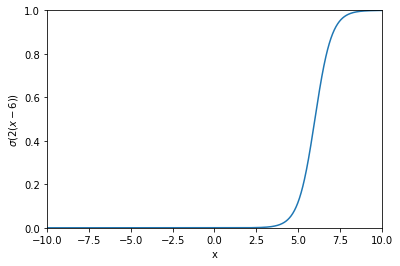

In [279]:
N = 1000
Dx = 1/N
xvals = np.linspace(-10, 10, N)

plt.plot(xvals, vecsigma(2*(xvals-6)))
plt.xlabel("x") 
plt.ylabel(r"$\sigma(2(x-6))$") 
plt.xlim([-10, 10])
plt.ylim([0, 1]);

plt.savefig('sigma2.png')